Preamble

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
iris = datasets.load_iris()

Implementing MyLogisticRegression

In [2]:
class MyLogisticRegression (object):
    
    #initialization
    def __init__(self):
        self.weight = None
        self.intercept = None
    
    #train a model
    def fit(self, data, target, alpha=0.1, max_iteration=50):
        
        assert len(data.shape) == 2
        
        #the number of features
        nfeatures = data.shape[1]
        #the number of samples
        nsamples = data.shape[0]
        #init W and b
        self.weight = np.zeros(nfeatures)
        self.intercept = np.zeros(1)
        #store costs
        costs = np.zeros(max_iteration)
        
        #begin to train
        for i in range(max_iteration):
            
            errors = self.prob(data) - target
            
            for j in range(nfeatures):
                
                self.weight[j] = self.weight[j] - alpha * np.mean(errors * data[:,j])
            
            self.intercept = self.intercept - alpha * np.mean(errors)
            costs[i] = self.cost(data, target)
        
        return costs
               
    def cost(self, data, target):
        
        #predictions
        y_prob = self.prob(data)
        #y*log(h(x)) + (1-y)*log(1-h(x))
        inner = target * np.log(y_prob) + (1-target) * np.log(1-y_prob)
        return -np.mean(inner)        
    
    def predict(self, data):
        
        #assign 1 where probability > 0.5
        prob = self.prob(data)
        predict = [int(p >= 0.5) for p in prob]
        return np.asarray(predict)
    
    def prob(self, data):
        
        #linear value
        lin = np.dot(data, self.weight) + self.intercept
        #sigmoid
        return 1 / (1+np.exp(-lin))
        
        

Create a 2 target feature dataset to to train MyLogisticRegression 

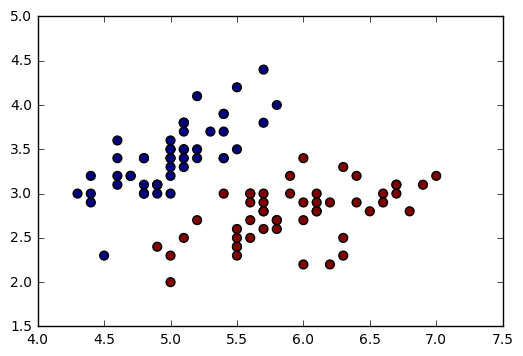

In [3]:
index = np.where(iris.target < 2)[0]

target = iris.target[index]
data = iris.data[index, :2]

plt.scatter(data[:,0], data[:,1], s=40, c=target)
plt.show()

Train MyLogisticRegression

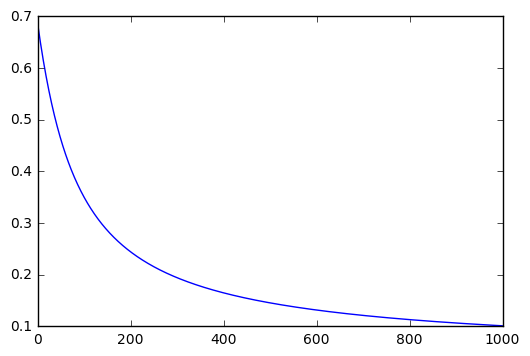

In [4]:
mylogreg = MyLogisticRegression()

costs = mylogreg.fit(data, target, alpha=0.1, max_iteration=1000)

plt.plot(np.arange(len(costs)), costs)
plt.show()

In [21]:
def plotboundary(model,data,target):
    
    #Plot the decision boundary
    #Point in the mesh [x_min, x_max], [y_min, y_max]
    
    h = 0.01 #step size in the mesh
    x_min = data[:,0].min() - 0.25
    x_max = data[:,0].max() + 0.25
    y_min = data[:,1].min() - 0.25
    y_max = data[:,1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.figure(1,figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(data[:,0], data[:,1], s=40, c=target)

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.show()

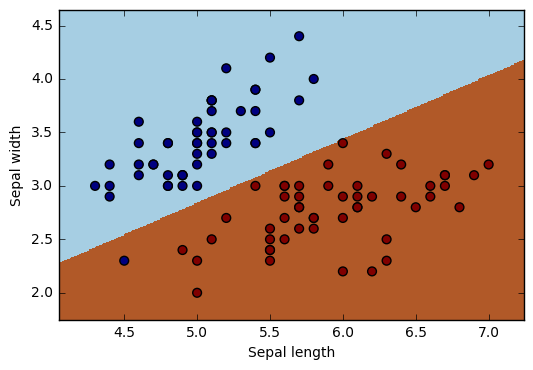

In [22]:
plotboundary(mylogreg, data, target)

Create a 3 target feature dataset

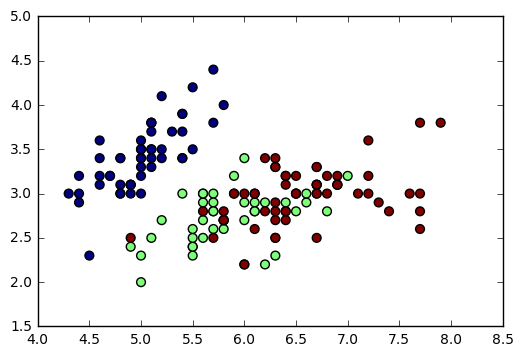

In [27]:
targetx = iris.target
datax = iris.data[:, :2]

plt.scatter(datax[:,0], datax[:,1], s=40, c=targetx)
plt.show()

In [61]:
class MyMultinomialLogReg (object):
    
    #initalization
    def __init__(self):
        #the list of models on each target feature
        self.models = []
        
    #train a model
    def fit(self, data, target, alpha = 0.1, max_iteration=100):
        
        assert len(data.shape) ==2
        
        #the number of target features
        ntgtfeat = len(np.unique(target))
        
        costs = np.zeros(max_iteration)
        
        for ti in range(ntgtfeat):
            #create one-vs-all target
            targeti = target.copy()
            targeti[target == ti] = 1
            targeti[target != ti] = 0
            
            #create a model
            ova = MyLogisticRegression()
            costi = ova.fit(data, targeti, alpha=alpha, max_iteration=max_iteration)
            
            # accumulate costs
            costs += np.asarray(costi)
            # store the model
            self.models.append(ova)
        
        # return averaged costs
        return costs / ntgtfeat
    
    #predict values
    def predict(self, data):
        probs = self.prob(data)
        return np.argmax(probs, axis=1)
    
    def prob(self, data):
        #number of target features
        n = len(self.models)
        probs = np.zeros((len(data), len(self.models)))
        
        #loop to get probabilities
        total_p = np.zeros(len(data))
        
        for i, model in enumerate(self.models):
            p = model.prob(data)
            probs[:,i] = p
            total_p += p 
            
        return probs / total_p[:, np.newaxis]
            
            

In [87]:
multilogreg = MyMultinomialLogReg()
costs = multilogreg.fit(datax, iris.target, alpha=0.1, max_iteration=1500)

n = len(multilogreg.models)
probs = np.zeros((len(datax), len(multilogreg.models)))
total_p = np.zeros(len(datax))


print(n)
print(probs[0])
print(total_p[0])

for i, model in enumerate(multilogreg.models):
    p = model.prob(datax)
    probs[:,i] = p
    total_p += p 

print(n)
print(probs[0])
print(total_p[0])

print(probs / total_p[:, np.newaxis])


3
[ 0.  0.  0.]
0.0
3
[ 0.95664306  0.10129014  0.04418524]
1.10211844054
[[  8.68003862e-01   9.19049476e-02   4.00911901e-02]
 [  7.08223081e-01   1.98064859e-01   9.37120595e-02]
 [  8.36794992e-01   1.19928070e-01   4.32769380e-02]
 [  8.20425325e-01   1.33084446e-01   4.64902297e-02]
 [  8.97616038e-01   7.39985530e-02   2.83854094e-02]
 [  9.18185401e-01   5.56510877e-02   2.61635116e-02]
 [  8.91944185e-01   8.30905010e-02   2.49653137e-02]
 [  8.54396798e-01   1.02498735e-01   4.31044672e-02]
 [  7.82993384e-01   1.63265264e-01   5.37413520e-02]
 [  7.64821691e-01   1.62309878e-01   7.28684308e-02]
 [  8.82376052e-01   7.78211079e-02   3.98028400e-02]
 [  8.75286088e-01   9.19893656e-02   3.27245461e-02]
 [  7.39259464e-01   1.81595649e-01   7.91448868e-02]
 [  8.30085160e-01   1.32181400e-01   3.77334402e-02]
 [  9.04979301e-01   5.84045547e-02   3.66161441e-02]
 [  9.58531205e-01   2.77658905e-02   1.37029043e-02]
 [  9.18185401e-01   5.56510877e-02   2.61635116e-02]
 [  8.68

In [88]:
multilogreg = MyMultinomialLogReg()
costs = multilogreg.fit(datax, iris.target, alpha=0.1, max_iteration=1500)


print(multilogreg.prob(datax[1]))
#print(np.argmax(multilogreg.prob(datax[1]),axis=1))
#print(multilogreg.predict(datax[1]))

[[ 0.70822308  0.19806486  0.09371206]
 [ 0.70822308  0.19806486  0.09371206]]


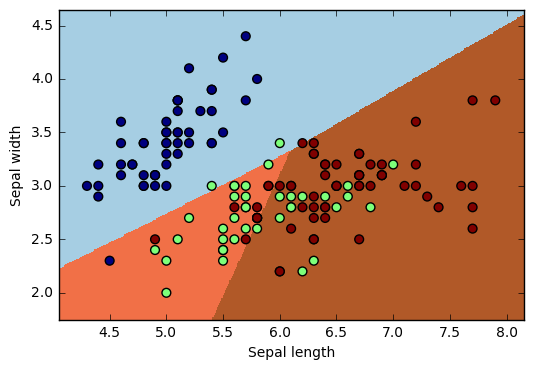

(1500,)
3


In [76]:
plotboundary(multilogreg, datax, targetx)
print(costs.shape)

print(len(multilogreg.models))